<a href="https://colab.research.google.com/github/doxeex/Analisis-de-datos---Feh-/blob/main/Data%20analysis%20-%20FEH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Glosario:
* Unidad: Personaje jugable, a elección del jugador.
* Powercreep: Situación en la que las unidades nuevas son completamente más poderosas que las unidades iniciales, haciendo que queden obsoletas.
* BST: suma total de las estadisticas del personaje (HP, ATK, SPD, DEF, RES)
* Tipos de movimiento:    
  * Infantry (Infanteria): 3 casillas de movimiento
  * Cavarlier (Caballeria): 4 casillas de movimiento
  * Flying (Volador): 3 casillas de movimiento, puede atravesar ciertos obstaculos
  * Armor (Acorazados/Armaduras): 1 casilla de movimiento
* Banner: Instancia en la que se pueden conseguir héroes de promoción de forma aleatoria, con unos rangos de probabilidad generalmente dentro del 1%.


In [ ]:
#Analisis dataset del juego para móviles "fire emblem heroes". Los datos contienen información hasta noviembre del 2024.

# Librerias

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("FEH Unit List.csv")
df.head()

,ID,Unit Name,Character,Backpack,Unit Obtained,Special Type,Theme,Rarity,Release Date,Refine Date,...,Tier.1,C,Tier.2,X,HP,ATK,SPD,DEF,RES,BST
0,1,Alfonse,Alfonse,NaN,Story,NaN,NaN,Story,2017-02-02,2018-08-08,...,NaN,Spur Atk,3.0,NaN,43,35,25,32,22,157
1,2,Sharena,Sharena,NaN,Story,NaN,NaN,Story,2017-02-02,2018-08-08,...,NaN,Fortify Def,3.0,NaN,43,32,32,29,22,158
2,3,Anna,Anna,NaN,Story,NaN,NaN,Story,2017-02-02,2018-08-08,...,3.0,Spur Res,3.0,NaN,41,29,38,22,28,158
3,4,Marth,Marth,NaN,Normal Pool,NaN,NaN,3★/4★,2017-02-02,2018-02-08,...,3.0,Spur Spd,3.0,NaN,41,31,34,29,23,158
4,5,Ogma,Ogma,NaN,Normal Pool,NaN,NaN,3★/4★,2017-02-02,2018-12-10,...,NaN,Spur Atk,3.0,NaN,47,35,34,28,13,157


In [ ]:
#En la tabla existen columnas que indican si las unidades tienen alguna temática en su diseño, por ejemplo la columna "Theme", indica el lanzamiento de las unidades de navidad o halloween
#Se retirarán las columnas cuyos valores no sean relevantes a primera vista, en este caso eliminaré las columnas "Backpack, Special type, theme y rarity". Que son valores más enfocados
#en particularidades de cada personaje que de función en general.

# Mostrar las columnas antes de eliminar
print("Columnas originales:")
print(df.columns)

# Eliminar columnas no necesarias
df = df.drop(columns=['Backpack', 'Special Type', 'Theme', 'Rarity'])

# Mostrar las columnas restantes
print("\nColumnas después de eliminar:")
print(df.columns)

Columnas originales:
Index(['ID', 'Unit Name', 'Character', 'Backpack', 'Unit Obtained',
       'Special Type', 'Theme', 'Rarity', 'Release Date', 'Refine Date',
       'Title of Origin', 'Secondary Title', 'Generation', 'Duel Effect',
       'Resplendant?', 'Color', 'Weapon Type', 'Movement Type', 'Blessing',
       'Weapon', 'Assist', 'Special', 'A', 'Tier', 'B', 'Tier.1', 'C',
       'Tier.2', 'X', 'HP', 'ATK', 'SPD', 'DEF', 'RES', 'BST'],
      dtype='object')

Columnas después de eliminar:
Index(['ID', 'Unit Name', 'Character', 'Unit Obtained', 'Release Date',
       'Refine Date', 'Title of Origin', 'Secondary Title', 'Generation',
       'Duel Effect', 'Resplendant?', 'Color', 'Weapon Type', 'Movement Type',
       'Blessing', 'Weapon', 'Assist', 'Special', 'A', 'Tier', 'B', 'Tier.1',
       'C', 'Tier.2', 'X', 'HP', 'ATK', 'SPD', 'DEF', 'RES', 'BST'],
      dtype='object')


In [ ]:
# Ver las primeras filas del dataset
df.head()

,ID,Unit Name,Character,Unit Obtained,Release Date,Refine Date,Title of Origin,Secondary Title,Generation,Duel Effect,...,Tier.1,C,Tier.2,X,HP,ATK,SPD,DEF,RES,BST
0,1,Alfonse,Alfonse,Story,2017-02-02,2018-08-08,Heroes,NaN,1,NaN,...,NaN,Spur Atk,3.0,NaN,43,35,25,32,22,157
1,2,Sharena,Sharena,Story,2017-02-02,2018-08-08,Heroes,NaN,1,NaN,...,NaN,Fortify Def,3.0,NaN,43,32,32,29,22,158
2,3,Anna,Anna,Story,2017-02-02,2018-08-08,Heroes,NaN,1,NaN,...,3.0,Spur Res,3.0,NaN,41,29,38,22,28,158
3,4,Marth,Marth,Normal Pool,2017-02-02,2018-02-08,Mystery,NaN,1,NaN,...,3.0,Spur Spd,3.0,NaN,41,31,34,29,23,158
4,5,Ogma,Ogma,Normal Pool,2017-02-02,2018-12-10,Mystery,NaN,1,NaN,...,NaN,Spur Atk,3.0,NaN,47,35,34,28,13,157


In [ ]:
#El primer analisis que realizaré responderá a la pregunta de ¿cuál es la magnitud del powercreep de las unidades con cada año que pasa?
#Para ello promediaré el valor de BST de cada uno de los tipos de unidades (infantería, caballería, jinetes pegaso, acorazados) por año (Release date)

# Asegurar tipo fecha y extraer año
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['year'] = df['Release Date'].dt.year

# Promedio de BST por año, movimiento y color
bst_by_year = df.groupby('year')['BST'].mean()
bst_by_year_move = df.groupby(['year','Movement Type'])['BST'].mean().unstack()
bst_by_year_color = df.groupby(['year','Color'])['BST'].mean().unstack()



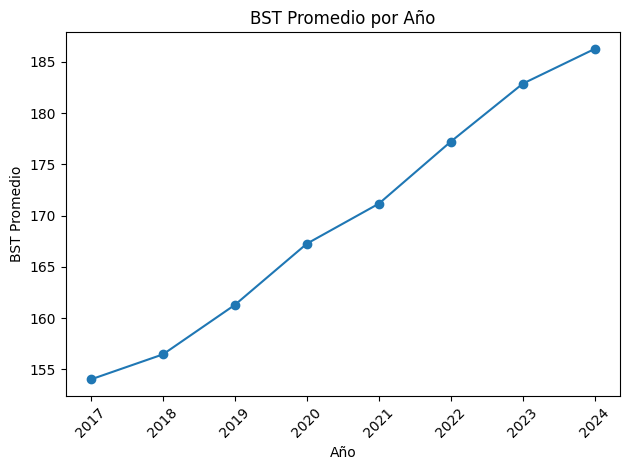

In [ ]:
plt.figure()
plt.plot(bst_by_year.index, bst_by_year.values, marker='o')
plt.title('BST Promedio por Año')
plt.xlabel('Año')
plt.ylabel('BST Promedio')
plt.xticks(bst_by_year.index, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#El BST que son la suma de las estadisticas de un personaje tienen una tendencia a subir con cada año que pasa, de una manera un tanto agresiva. Con la subida del BST sube también la competitividad dentro del juego
#Los jugadores están forzados a elegir entre 2 opciones si desean tener mayores recompensas con los distintos modos de juego.
#1° Invertir y comprar recursos en obtener a los personajes nuevos más fuertes para mantenerse o impulsar su competitividad.
#2° Ahorrar los recursos para decidir a largo plazo cuáles personajes valen más para los distintos rangos competitivos dentro del juego.

#La segunda opción es por la que optan la mayoría de usuarios ya que requiere de administrar y analizar los recursos que dan de forma gratuita dentro del juego.

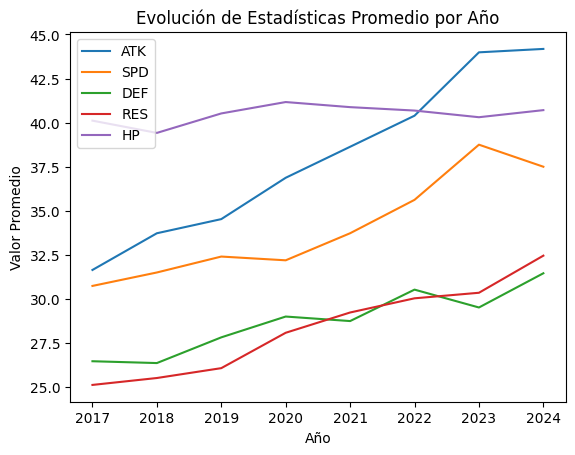

In [ ]:
stats = ['ATK','SPD','DEF','RES','HP']
stats_by_year = df.groupby('year')[stats].mean()
plt.figure()
for s in stats:
    plt.plot(stats_by_year.index, stats_by_year[s], label=s)
plt.title('Evolución de Estadísticas Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.legend()
plt.show()

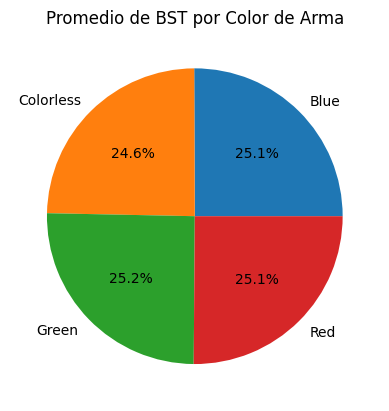

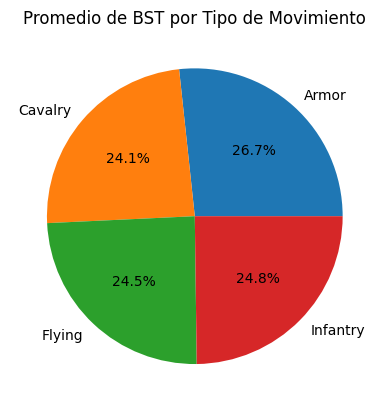

In [ ]:
bst_color = df.groupby('Color')['BST'].mean()
plt.figure()
plt.pie(bst_color.values, labels=bst_color.index, autopct='%1.1f%%')
plt.title('Promedio de BST por Color de Arma')
plt.show()

bst_move = df.groupby('Movement Type')['BST'].mean()
plt.figure()
plt.pie(bst_move.values, labels=bst_move.index, autopct='%1.1f%%')
plt.title('Promedio de BST por Tipo de Movimiento')
plt.show()

In [ ]:
# 1) Carga y limpieza previa (asume que ya hiciste el drop de las demás columnas)
df = pd.read_csv("FEH Unit List.csv")
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

# Acotamos al rango que quieres
df = df[(df['release_date'] >= '2017-02-02') & (df['release_date'] <= '2024-11-16')]

# 2) Columnas con PRF
prf_cols = ['weapon', 'assist', 'special', 'A', 'B', 'C']

# 3) Contar cuántas PRF por año en cada columna
#    Esto da un DataFrame donde cada fila es un año y cada columna es el count de PRF
counts_by_year = df.groupby('year')[prf_cols] \
                   .apply(lambda g: g.eq('PRF').sum())

# 4) Gráfico de barras apiladas (o separadas) para cada columna
plt.figure(figsize=(10,6))
for col in prf_cols:
    plt.bar(counts_by_year.index, counts_by_year[col], label=col)

plt.title('Cantidad de PRF por Año y Tipo de Habilidad')
plt.xlabel('Año')
plt.ylabel('Cantidad de PRF')
plt.legend(title='Columna PRF')
plt.xticks(counts_by_year.index, rotation=45)
plt.tight_layout()
plt.show()